### rdd_simulate1

Exemplo prático do livro "Causal Inference: The Mixtape" referente ao capítulo tratando sobre Regressão Descontínua (*RDD - Regression Discontinuity Design*).

In [1]:
# Importando os pacotes necessários
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from itertools import combinations 
import plotnine as p
import ssl
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Criando uma função de importação/leitura dos dados
ssl._create_default_https_context = ssl._create_unverified_context
def read_data(file):
    return pd.read_stata("https://github.com/scunning1975/mixtape/raw/master/" + file)

In [3]:
# Criando uma base aleatória com distribuição normal para realizar a simulação
dat = pd.DataFrame({'x': np.random.normal(50, 25, 1000)}) # Gerando base de 1000 observações, com média de 50 e variância de 25
dat

,x
0,52.744212
1,20.508239
2,57.633007
3,40.348682
4,59.593664
...,...
995,44.960716
996,32.289807
997,73.955098
998,78.318119


In [4]:
## Tratando a base
# Restringindo nossa base ao intervalo de 0 a 100
dat.loc[dat.x<0, 'x'] = 0 
dat = dat[dat.x<100]
# Criando nossa variável dummy de status do "tratamento"
dat['D'] = 0
dat.loc[dat.x>50, 'D'] = 1 # Definindo nosso 'cutoff' no valor de 50
# Criando nossas variáveis de resultados potências
dat['y1'] = 25 + 0*dat.D + 1.5 * dat.x + np.random.normal(0, 20, dat.shape[0]) # Para o caso em que o tratamento não ocorre
dat['y2'] = 25 + 40*dat.D + 1.5 * dat.x + np.random.normal(0, 20, dat.shape[0]) # Para o caso em que o tratamento ocorre
dat

,x,D,y1,y2
0,52.744212,1,113.362643,138.949883
1,20.508239,0,59.695993,58.701400
2,57.633007,1,107.644858,108.702289
3,40.348682,0,77.039126,79.597429
4,59.593664,1,143.370774,177.755903
...,...,...,...,...
995,44.960716,0,96.045708,78.964815
996,32.289807,0,63.098405,24.943768
997,73.955098,1,139.554223,192.728899
998,78.318119,1,161.470414,189.895536


"Resultados Potencias Contrafactuais


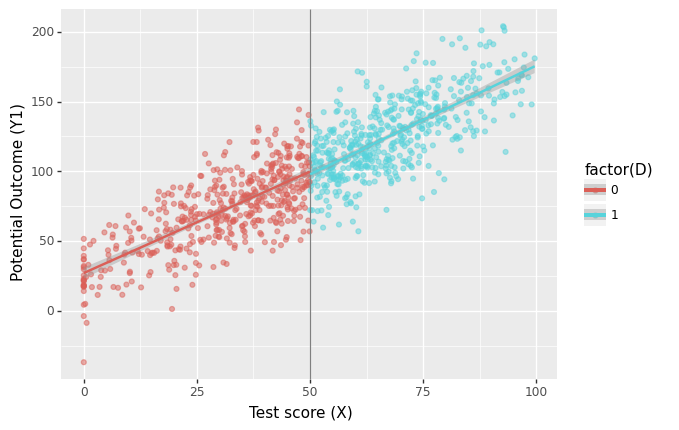

<ggplot: (187989268393)>

In [5]:
# Plotando nossa simulação para o caso hipotético de ausência do tratamento
print('"Resultados Potencias Contrafactuais')
p.ggplot(dat, p.aes(x='x', y='y1', color = 'factor(D)')) +    p.geom_point(alpha = 0.5) +    p.geom_vline(xintercept = 50, colour = "grey") +    p.stat_smooth(method = "lm", se = 'F') +    p.labs(x = "Test score (X)", y = "Potential Outcome (Y1)")

Como podemos ver acima, dado que a continuidade se mantém no *cutoff*, o pressuposto chave de continuidade para o RDD é válido.

### rdd_simulate2

Vamos simular agora o caso mais real onde o tratamento de fato ocorreu.

Resultados Potenciais Contrafactuais após o Tratamento


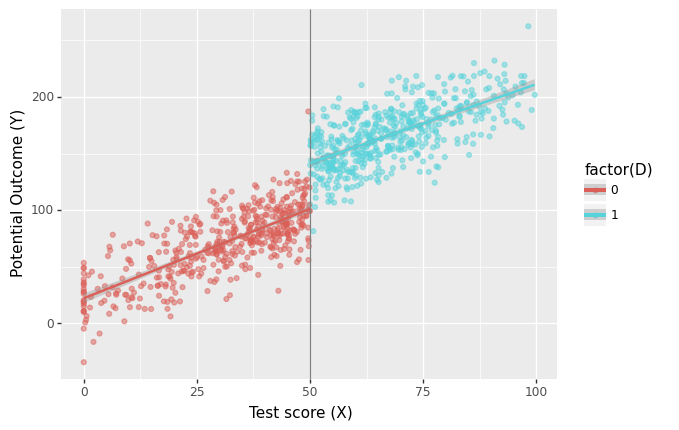

<ggplot: (187991473445)>

In [6]:
# Plotando nossa simulação para o caso em que o tratamento ocorreu
print('Resultados Potenciais Contrafactuais após o Tratamento')
p.ggplot(dat, p.aes(x='x', y='y2', color = 'factor(D)')) +    p.geom_point(alpha = 0.5) +    p.geom_vline(xintercept = 50, colour = "grey") +    p.stat_smooth(method = "lm", se = 'F') +    p.labs(x = "Test score (X)", y = "Potential Outcome (Y)")

É fácil visualizar o salto descontínuo em nossa variável de interesse pelo gráfico. É neste salto que está contido o tão almejado *LATE (Local Average Treatment Effect)* que buscamos.

### rdd_simulate3

Simulando o caso em que o processo de geração dos dados é não-linear.

In [7]:
## Criando uma nova base aleatória com distribuição normal
# Note que esta nova base é tem o mesmo tamanho da anterior, porém tem maior média e é mais dispersa
dat = pd.DataFrame({'x': np.random.normal(100, 50, 1000)})
# Restringindo nossa base a um limite inferior de 0
dat.loc[dat.x<0, 'x'] = 0 
# Criando nossa variável dummy de status do "tratamento"
dat['D'] = 0
dat.loc[dat.x>140, 'D'] = 1 # Definindo nosso 'cutoff' no valor de 140
# Gerando variáveis não-lineares
dat['x2'] = dat['x']**2 # Criando uma coluna com a 'running variable' ao quadrado
dat['x3'] = dat['x']**3 # Criando uma coluna com a 'running variable' ao cubo
# Criando uma coluna com nossa variável de interesse trasformada por processo não-linear
dat['y3'] = 10000 + 0*dat.D - 100 * dat.x + dat.x2 + np.random.normal(0, 1000, 1000)
dat = dat[dat.x < 280] # Limitando nossa 'running variable' ao valor máximo de 279
dat

,x,D,x2,x3,y3
0,157.984526,1,24959.110533,3.943153e+06,17845.382139
1,130.068318,0,16917.767356,2.200466e+06,14599.733836
2,40.582321,0,1646.924810,6.683603e+04,7751.358139
3,44.781550,0,2005.387221,8.980435e+04,7829.271528
4,79.537530,0,6326.218650,5.031718e+05,9450.348810
...,...,...,...,...,...
995,130.582633,0,17051.824098,2.226672e+06,13409.614358
996,156.436317,1,24472.321260,3.828360e+06,17933.655473
997,123.924202,0,15357.207729,1.903130e+06,12875.201391
998,140.003045,1,19600.852549,2.744179e+06,16649.725184


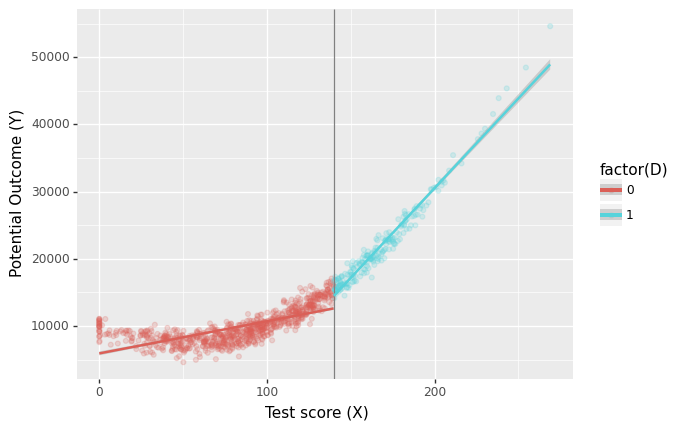

<ggplot: (187991530596)>

In [8]:
# Plotando a simulação com modelo linear para esperança condicional usando 'y3' como variável dependente 
p.ggplot(dat, p.aes(x='x', y='y3', color = 'factor(D)')) +    p.geom_point(alpha = 0.2) +    p.geom_vline(xintercept = 140, colour = "grey") +    p.stat_smooth(method = "lm", se = 'F') +    p.labs(x = "Test score (X)", y = "Potential Outcome (Y)")

### rdd_simulate4

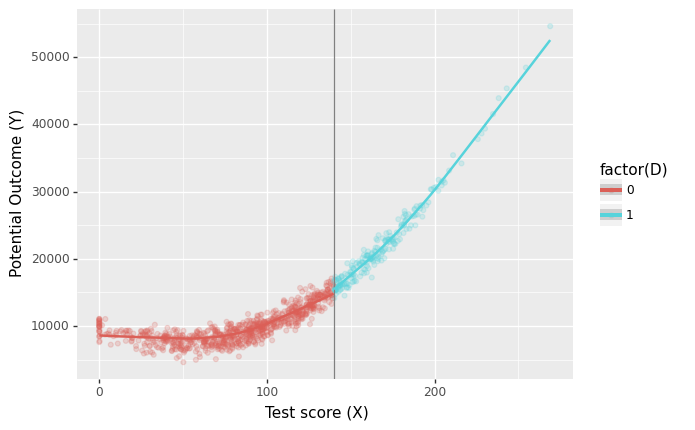

<ggplot: (187991773368)>

In [9]:
# Plotando a simulação ajustando para polinômios de ordem maior
p.ggplot(dat, p.aes(x='x', y='y3', color = 'factor(D)')) +    p.geom_point(alpha = 0.2) +    p.geom_vline(xintercept = 140, colour = "grey") +    p.stat_smooth(method = "lowess", se = 'F') +    p.labs(x = "Test score (X)", y = "Potential Outcome (Y)")

Comparando os dois últimos gráficos acima podemos ver que um simples ajuste utilizando polinômio de 2º grau já elimina o salto espúrio que nosso modelo apresentava (devido ao processo não-linear de geração dos dados). Note que fazemos isso apenas trocando o valor do parâmetro `stat_smooth` de *lm* para *lowess*.

In [10]:
# Estimando a regressão totalmente interativa
all_columns = "+".join(dat.columns.difference(["D", 'y3']))
formula = 'y3 ~ D * ({})'.format(all_columns)
regression = sm.OLS.from_formula(formula, data = dat).fit()
regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y3   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     4867.
Date:                Wed, 01 Feb 2023   Prob (F-statistic):               0.00
Time:                        22:29:34   Log-Likelihood:                -8350.6
No. Observations:                1000   AIC:                         1.672e+04
Df Residuals:                     992   BIC:                         1.676e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9743.6250    169.877     57.357      0.000    9410.266    1.01e+04
D           7467.0744   1.64e+04      0.455      0.649   -2.48e+04    3.97e+04
x            -84.4959      9.342     -9.045      0.000    -102.829     -66.163
x2             0.7988      0.150      5.308      0.000       0.503       1.094
x3             0.0007      0.001      1.051      0.293      -0.001       0.002
D:x         -143.4336    264.868     -0.542      0.588    -663.199     376.332
D:x2           0.9430      1.406      0.671      0.503      -1.816       3.702
D:x3          -0.0021      0.003     -0.849      0.396      -0.007       0.003
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.901
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.750
Skew:                          -0.047   Prob(JB):                        0.687
Kurtosis:                       2.904   Cond. No.                     1.86e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.86e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""